In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import pandas as pd

PKL_FOLDER = "/content/drive/MyDrive/Fraud_pkl"

pkl_files = sorted([os.path.join(PKL_FOLDER, f)
                    for f in os.listdir(PKL_FOLDER) if f.endswith('.pkl')])

print("Total files:", len(pkl_files))


Total files: 183


In [ ]:
df_list = []

for file in pkl_files:
    print("Loading:", file)
    temp_df = pd.read_pickle(file)
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)
print("Final dataset shape:", df.shape)
df.head()


Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-01.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-02.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-03.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-04.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-05.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-06.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-07.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-08.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-09.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-10.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-11.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-12.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-13.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-14.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-15.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-16.pkl
Loading: /content/drive/MyDrive/Fraud_pkl/2018-04-17.pkl
Loading: /content/drive/MyDrive

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [ ]:
df.head()
df.columns


Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

In [ ]:
X = df.drop(['TRANSACTION_ID', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_FRAUD',"TX_DATETIME","TX_FRAUD_SCENARIO"], axis=1).values
y = df['TX_FRAUD'].values


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
num_classes = len(encoder.classes_)

print("Classes:", encoder.classes_)
print("Total classes:", num_classes)



Classes: [0 1]
Total classes: 2


In [ ]:
import pandas as pd
import numpy as np
import glob
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Convert TX_DATETIME to numerical form
df["TX_DATETIME"] = pd.to_datetime(df["TX_DATETIME"])
df["TX_YEAR"] = df["TX_DATETIME"].dt.year
df["TX_MONTH"] = df["TX_DATETIME"].dt.month
df["TX_DAY"] = df["TX_DATETIME"].dt.day
df["TX_HOUR"] = df["TX_DATETIME"].dt.hour
df["TX_MINUTE"] = df["TX_DATETIME"].dt.minute
df["TX_SECOND"] = df["TX_DATETIME"].dt.second

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=200,max_depth=15,random_state=42,class_weight="balanced")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=42)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight   # ← IMPORTANT

from xgboost import XGBClassifier
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {
    0: weights[0],
    1: weights[1]     # weight for fraud class
}

print("Class Weights:", class_weights)

Class Weights: {0: np.float64(0.5042200512798893), 1: np.float64(59.74098628644083)}


In [ ]:
model = XGBClassifier(
    max_depth=6,
    n_estimators=300,
    learning_rate=0.05,
    scale_pos_weight=class_weights[1],
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba))



ROC-AUC: 0.6613698911977144


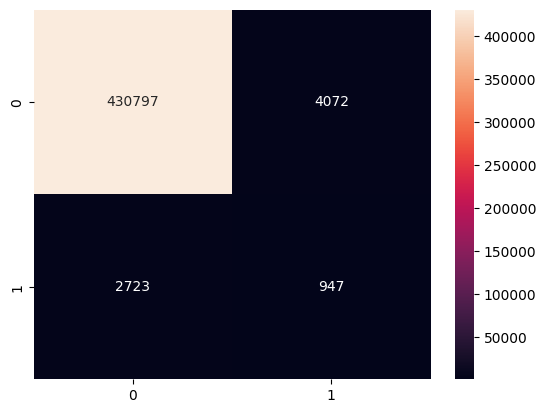

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    434869
           1       0.19      0.26      0.22      3670

    accuracy                           0.98    438539
   macro avg       0.59      0.62      0.61    438539
weighted avg       0.99      0.98      0.99    438539

ROC-AUC: 0.6613698911977144
